In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
def calculate_overall_rmse(df):
    """
    Calculate the overall RMSE across x, y, z, and yaw compared to their reference values.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the actual values and reference values.
    
    Returns:
    float: The overall RMSE across all dimensions.
    """
    
    # Extract actual and reference values as numpy arrays
    actual_values = df[['x', 'y', 'z', 'yaw']].to_numpy()
    reference_values = df[['x_ref', 'y_ref', 'z_ref', 'yaw_ref']].to_numpy()
    # actual_values = actual_values[83:]
    # reference_values = reference_values[3:-80]
    
    # Compute the squared differences
    squared_errors = (actual_values - reference_values) ** 2
    
    # Compute the mean of the sum of squared differences across all dimensions
    mse = np.mean(np.sum(squared_errors, axis=1))
    
    # Return the square root of the mean squared error (overall RMSE)
    overall_rmse = np.sqrt(mse)
    
    return overall_rmse

In [18]:
log_file_path = 'logtest.log'

# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,mpc_time,metadata
0,0.000002,0.081765,-0.096984,1.336803,-0.222783,-0.975092,0.526789,-0.630922,0.8,0.600000,4.839783e-07,-0.8,0.0,0.026021,Sim
1,0.027011,0.081765,-0.096984,1.336803,-0.222783,-0.975092,0.547202,-0.625934,0.8,0.599949,7.832690e-03,-0.8,0.0,0.028653,Horizon:3.0
2,0.056666,0.080590,-0.095785,1.329883,-0.222912,-0.975092,0.560101,-0.635851,0.8,0.599775,1.643081e-02,-0.8,0.0,0.027553,Num Steps:20
3,0.085096,0.080590,-0.095785,1.329883,-0.222912,-0.975092,0.577005,-0.629313,0.8,0.599493,2.467041e-02,-0.8,0.0,0.027928,No Pyjoules
4,0.114202,0.080907,-0.095228,1.329029,-0.223080,-0.975092,0.591881,-0.620994,0.8,0.599086,3.310106e-02,-0.8,0.0,0.028252,0


In [19]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"{df_log['metadata'][1]}")
print(f"{df_log['metadata'][2]}")
print(f"{df_log['metadata'][3]}")
print(f"RMSE: {calculate_overall_rmse(df_log)}")


This data comes from: Sim
Horizon:3.0
Num Steps:20
No Pyjoules
RMSE: 0.4511330929934735


In [20]:
def plot_adjusted_avg_and_max_xyz_vs_reference(df):
    fig, axs = plt.subplots(4, 4, figsize=(20, 12), sharex=False)
    time_max = df['time'].max()
    time_min = df['time'].min()
    x_lim = (time_min-1, time_max+1)
    
    # Maximum values
    max_throttle = 1.0
    min_throttle = 0.0
    rates_max_abs = 0.8
    max_rate = rates_max_abs
    min_rate = -rates_max_abs


    # Row 1: Plot x, y, z, psi vs references
    # plot x vs x_ref
    axs[0, 0].plot(df['time'], df['x'], label='x', color='red')
    axs[0, 0].plot(df['time'], df['x_ref'], label='x_ref', color='blue', linestyle='--')
    axs[0, 0].set_ylabel('x / x_ref')
    axs[0, 0].set_xlabel('time')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(x_lim)

    # plot y vs y_ref
    axs[0, 1].plot(df['time'], df['y'], label='y', color='red')
    axs[0, 1].plot(df['time'], df['y_ref'], label='y_ref', color='blue', linestyle='--')
    axs[0, 1].set_ylabel('y / y_ref')
    axs[0, 1].set_xlabel('time')
    axs[0, 1].legend()
    axs[0, 1].set_xlim(x_lim)

    # plot z vs z_ref
    axs[0, 2].plot(df['time'], -1*df['z'], label='z', color='red')
    axs[0, 2].plot(df['time'], -1*df['z_ref'], label='z_ref', color='blue', linestyle='--')
    axs[0, 2].set_ylabel('z / z_ref')
    axs[0, 2].set_xlabel('time')
    axs[0, 2].legend()
    axs[0, 2].set_xlim(x_lim)
    axs[0, 2].set_ylim(0,-1*df['z'].min()+.1)


    # plot psi vs psi_ref
    axs[0, 3].plot(df['time'], df['yaw'], label='psi', color='red')
    axs[0, 3].plot(df['time'], df['yaw_ref'], label='psi_ref', color='blue', linestyle='--')
    axs[0, 3].set_ylabel('psi / psi_ref')
    axs[0, 3].set_xlabel('time')
    axs[0, 3].legend()
    axs[0, 3].set_xlim(x_lim)

    # Row 2: Plot cross comparisons (x vs y, x vs z, y vs z, time vs solve_time)
    # plot x vs y and x_ref vs y_ref
    axs[1, 0].plot(df['x'], df['y'], label='x vs y', color='red')
    axs[1, 0].plot(df['x_ref'], df['y_ref'], label='x_ref vs y_ref', color='blue', linestyle='--')
    axs[1, 0].set_ylabel('y')
    axs[1, 0].set_xlabel('x')
    axs[1, 0].legend()

    # plot x vs z and x_ref vs z_ref
    axs[1, 1].plot(df['x'], -1*df['z'], label='x vs z', color='red')
    axs[1, 1].plot(df['x_ref'], -1*df['z_ref'], label='x_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 1].set_ylabel('z')
    axs[1, 1].set_xlabel('x')
    axs[1, 1].set_ylim(0,-1*df['z'].min()+.1)
    axs[1, 1].legend()

    # plot y vs z and y_ref vs z_ref
    axs[1, 2].plot(df['y'], -1*df['z'], label='y vs z', color='red')
    axs[1, 2].plot(df['y_ref'], -1*df['z_ref'], label='y_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 2].set_ylabel('z')
    axs[1, 2].set_xlabel('y')
    axs[1, 2].set_ylim(0,-1*df['z'].min()+.1)
    axs[1, 2].legend()

    # plot time vs solve_time
    axs[1, 3].plot(df['time'], df['mpc_time']* 1e-9, label='solve_time', color='purple')
    axs[1, 3].set_ylabel('solve_time')
    axs[1, 3].set_xlabel('time')
    axs[1, 3].legend()
    axs[1, 3].set_xlim(x_lim)

    # Row 3: Plot fx, fy, fz, tauz vs time
    # plot throttle vs time
    axs[2, 0].plot(df['time'], -1*df['throttle'], label='throttle', color='blue')
    axs[2, 0].axhline(y=max_throttle, color='red', linestyle='--', label=f'+{max_throttle}')
    axs[2, 0].axhline(y=min_throttle, color='red', linestyle='--', label=f'-{max_throttle}')
    axs[2, 0].set_ylabel('throttle')
    axs[2, 0].set_xlabel('time')
    axs[2, 0].legend()
    axs[2, 0].set_ylim((-0.2, 1.2))
    axs[2, 0].set_xlim(x_lim)

    # plot roll_rate vs time
    axs[2, 1].plot(df['time'], df['roll_rate'], label='roll_rate', color='orange')
    axs[2, 1].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 1].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 1].set_ylabel('roll_rate')
    axs[2, 1].set_xlabel('time')
    axs[2, 1].legend()
    axs[2, 1].set_ylim((-1.0, 1.0))
    axs[2, 1].set_xlim(x_lim)

    # plot pitch_rate vs time
    axs[2, 2].plot(df['time'], df['pitch_rate'], label='pitch_rate', color='green')
    axs[2, 2].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 2].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 2].set_ylabel('pitch_rate')
    axs[2, 2].set_xlabel('time')
    axs[2, 2].legend()
    axs[2, 2].set_ylim((-1.0, 1.0))
    axs[2, 2].set_xlim(x_lim)

    # plot yaw_rate vs time
    axs[2, 3].plot(df['time'], df['yaw_rate'], label='yaw_rate', color='purple')
    axs[2, 3].axhline(y=max_rate, color='red', linestyle='--', label=f'+{max_rate}')
    axs[2, 3].axhline(y=min_rate, color='red', linestyle='--', label=f'-{min_rate}')
    axs[2, 3].set_ylabel('yaw_rate')
    axs[2, 3].set_xlabel('time')
    axs[2, 3].legend()
    axs[2, 3].set_ylim((-1.0, 1.0))
    axs[2, 3].set_xlim(x_lim)

    # Row 4: plot pred_time * nr_time vs time
    # plot pred_time vs time
    # axs[3, 0].plot(df['time'][1:], df['pred_time'][1:], label='pred_time', color='blue')
    # axs[3, 0].set_ylabel('pred_time')
    # axs[3, 0].set_xlabel('time')
    # axs[3, 0].legend()
    # axs[3, 0].set_xlim(x_lim)

    # # plot nr_time vs time
    # axs[3, 1].plot(df['time'][1:], df['nr_time'][1:], label='nr_time', color='orange')
    # axs[3, 1].set_ylabel('nr_time')
    # axs[3, 1].set_xlabel('time')
    # axs[3, 1].legend()
    # axs[3, 1].set_xlim(x_lim)

    # # plot v_fz vs time
    # axs[3, 2].plot(df['time'], df['v_fz'], label='cbf_fz', color='green')
    # axs[3, 2].set_ylabel('v_fz')
    # axs[3, 2].set_xlabel('time')
    # axs[3, 2].legend()
    # axs[3, 2].set_xlim(x_lim)

    # # plot v_tz vs time
    # axs[3, 3].plot(df['time'], df['v_tz'], label='cbf_tauz', color='purple')
    # axs[3, 3].set_ylabel('v_tauz')
    # axs[3, 3].set_xlabel('time')
    # axs[3, 3].legend()
    # axs[3, 3].set_xlim(x_lim)
    

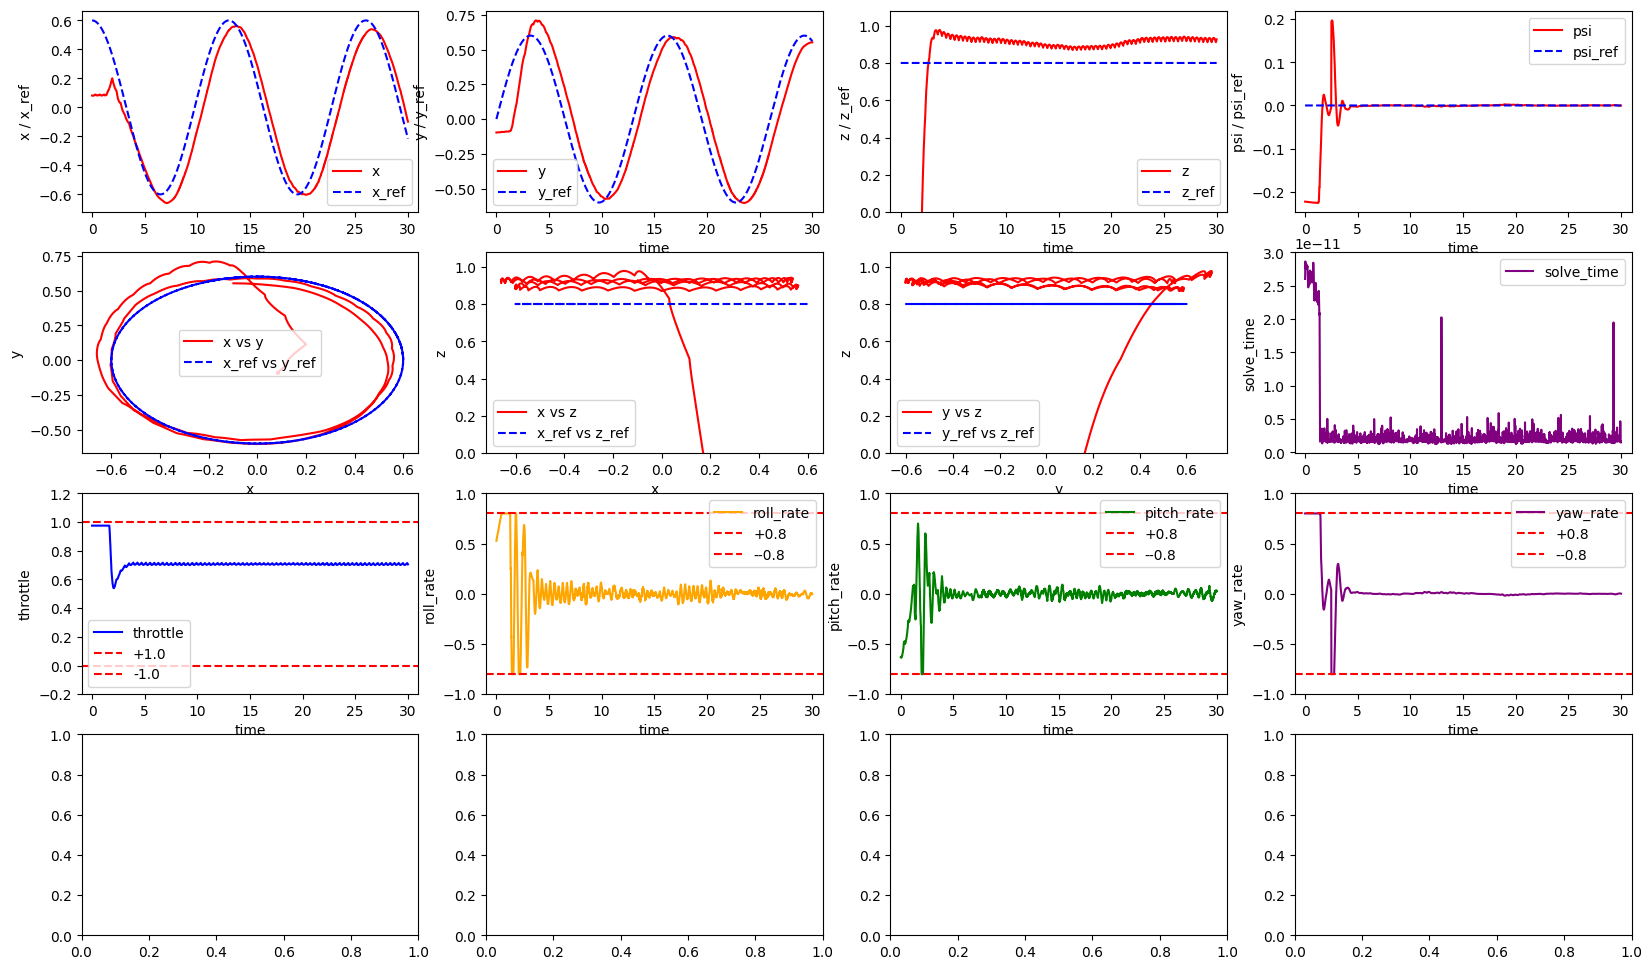

In [21]:
# Reuse the plotting function defined earlier for the uploaded .log data
plot_adjusted_avg_and_max_xyz_vs_reference(df_log)

In [22]:
df_log['yaw_ref']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2908    0.0
2909    0.0
2910    0.0
2911    0.0
2912    0.0
Name: yaw_ref, Length: 2913, dtype: float64